In [27]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
# 1. Load Dataset
file_path = '/content/IMDB Dataset.csv'
df = pd.read_csv(file_path)

In [5]:
# 2. Handle missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 review       0
sentiment    0
dtype: int64


In [6]:
# 3. Remove duplicates
df.drop_duplicates(inplace=True)
print("Shape after removing duplicates:", df.shape)

Shape after removing duplicates: (49582, 2)


<ipython-input-7-d7c8e92eaa61>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0))


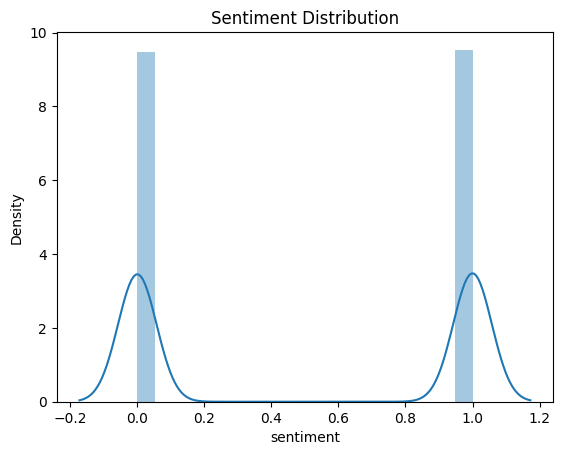

In [7]:
# 4. Display distribution of sentiment
sns.distplot(df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0))
plt.title('Sentiment Distribution')
plt.show()

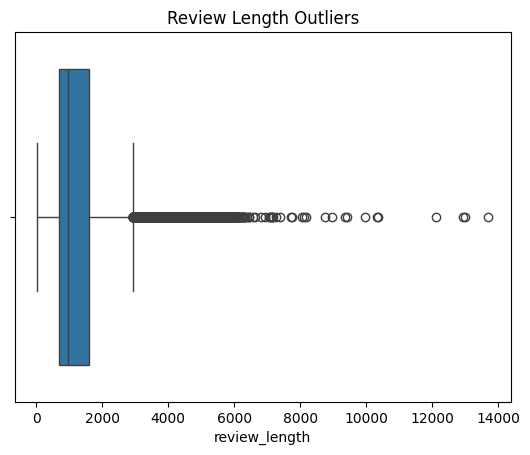

In [8]:
# 5. Detect outliers using review length
df['review_length'] = df['review'].apply(len)
sns.boxplot(x=df['review_length'])
plt.title('Review Length Outliers')
plt.show()

In [9]:
# 6. Encoding sentiment labels
le = LabelEncoder()
df['sentiment_encoded'] = le.fit_transform(df['sentiment'])


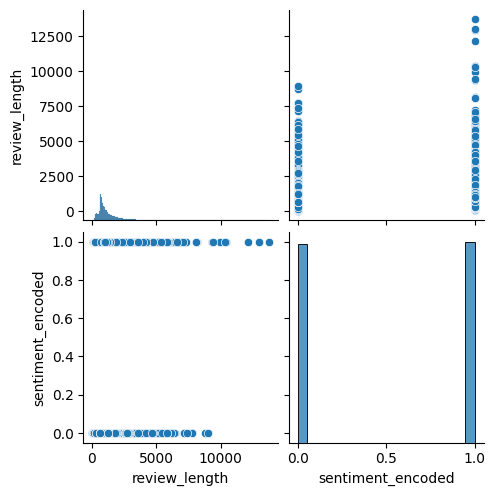

In [10]:
# 7. Correlation analysis
sns.pairplot(df[['review_length', 'sentiment_encoded']])
plt.show()

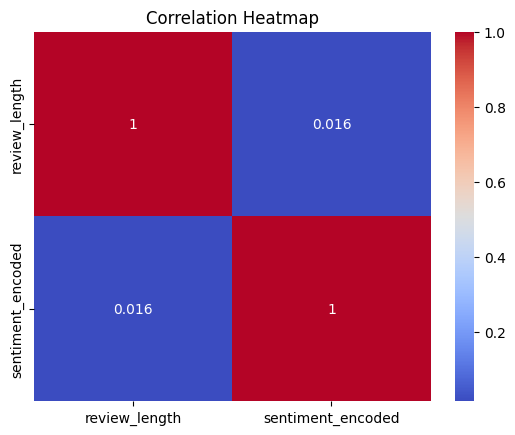

In [11]:
corr = df[['review_length', 'sentiment_encoded']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [12]:
# 8. Feature Extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['review']).toarray()

In [13]:
# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [14]:
# Target variable
y = df['sentiment_encoded']

In [15]:
# 9. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# 10. Model 1: Logistic Regression
model_lr = LogisticRegression(max_iter=500)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)


In [17]:
# 11. Model 2: Random Forest Classifier
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)


In [18]:
# 12. Evaluate
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))



Logistic Regression Accuracy: 0.8641726328526772
[[4231  708]
 [ 639 4339]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      4939
           1       0.86      0.87      0.87      4978

    accuracy                           0.86      9917
   macro avg       0.86      0.86      0.86      9917
weighted avg       0.86      0.86      0.86      9917



In [19]:
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8397700917616214
[[4139  800]
 [ 789 4189]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      4939
           1       0.84      0.84      0.84      4978

    accuracy                           0.84      9917
   macro avg       0.84      0.84      0.84      9917
weighted avg       0.84      0.84      0.84      9917



In [20]:
# 13. Model Accuracy Comparison
models = ['Logistic Regression', 'Random Forest']
accuracies = [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_rf)]

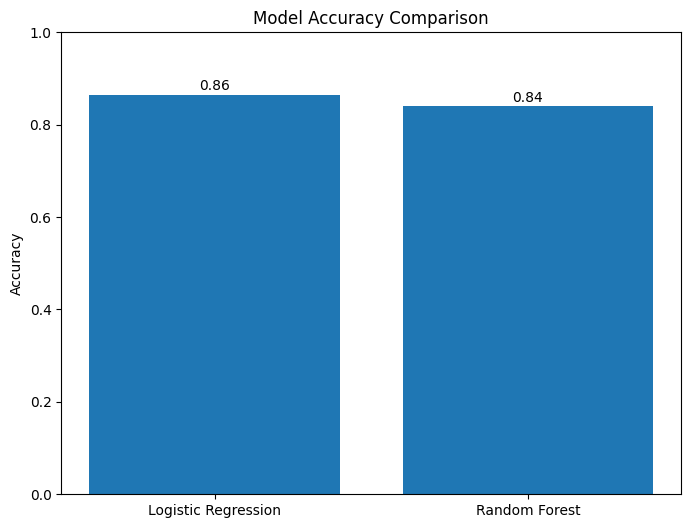

In [21]:
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
for index, value in enumerate(accuracies):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center')
plt.show()

In [22]:
# 14. Predict sentiment from user input in a loop
def clean_text(text):
    text = re.sub('<.*?>', '', text)  # Remove HTML tags
    text = re.sub('[^a-zA-Z]', ' ', text)  # Remove special characters and numbers
    text = text.lower()  # Convert to lowercase
    text = ' '.join(text.split())  # Remove extra spaces
    return text

In [31]:
while True:
    user_input = input("\nEnter a movie review to predict sentiment (or type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        print("Exiting the prediction loop. Thank you!")
        break

    cleaned_input = clean_text(user_input)
    user_input_transformed = vectorizer.transform([cleaned_input]).toarray()
    user_input_transformed = scaler.transform(user_input_transformed)

    # Predict using both models
    pred_lr = model_lr.predict(user_input_transformed)
    pred_rf = model_rf.predict(user_input_transformed)

    # Decode prediction
    sentiment_lr = le.inverse_transform(pred_lr)[0]
    sentiment_rf = le.inverse_transform(pred_rf)[0]

    # Display friendly messages with emojis
    message_lr = "✅ Good Review!" if sentiment_lr == 'positive' else "❌ Bad Review!"
    message_rf = "✅ Good Review!" if sentiment_rf == 'positive' else "❌ Bad Review!"

    print(f"\nLogistic Regression Model Prediction: {sentiment_lr.upper()} -> {message_lr}")
    print(f"Random Forest Model Prediction: {sentiment_rf.upper()} -> {message_rf}")



Enter a movie review to predict sentiment (or type 'exit' to quit): The plot was boring and the acting was terrible

Logistic Regression Model Prediction: NEGATIVE -> ❌ Bad Review!
Random Forest Model Prediction: NEGATIVE -> ❌ Bad Review!

Enter a movie review to predict sentiment (or type 'exit' to quit): This was one of the worst films ever made.

Logistic Regression Model Prediction: NEGATIVE -> ❌ Bad Review!
Random Forest Model Prediction: NEGATIVE -> ❌ Bad Review!

Enter a movie review to predict sentiment (or type 'exit' to quit): An outstanding film with a powerful message.

Logistic Regression Model Prediction: POSITIVE -> ✅ Good Review!
Random Forest Model Prediction: POSITIVE -> ✅ Good Review!

Enter a movie review to predict sentiment (or type 'exit' to quit): exit
Exiting the prediction loop. Thank you!
